#**Задание №1**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_shape=(8, ), activation='linear', name='first'))
model.add(Dense(8, activation='linear', name='second'))
model.add(Dense(8, activation='linear', name='third'))

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [ ]:
%%time
model.fit(X_norm_train, y_train, validation_data=(X_norm_test, y_test), epochs=100)

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5875 - mae: 0.5668 - val_loss: 0.6096 - val_mae: 0.5813
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5740 - mae: 0.5574 - val_loss: 0.5924 - val_mae: 0.5677
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5632 - mae: 0.5522 - val_loss: 0.5834 - val_mae: 0.5535
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5568 - mae: 0.5489 - val_loss: 0.5745 - val_mae: 0.5594
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5508 - mae: 0.5475 - val_loss: 0.5691 - val_mae: 0.5489
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5482 - mae: 0.5454 - val_loss: 0.5652 - val_mae: 0.5482
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5455 - mae: 0.5448 - val_loss: 0.5681 - val_mae: 0.5678
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - 

In [ ]:
print(model.predict(X_norm_test))

129/129 [==============================] - 0s 2ms/step
[[2.459109   2.4345987  2.4421792  ... 2.4351199  2.4477468  2.4371138 ]
 [2.9633024  2.942393   2.9557014  ... 2.9349544  2.952651   2.9455733 ]
 [2.0723708  2.0566406  2.0744572  ... 2.050598   2.057899   2.0573893 ]
 ...
 [0.9282439  0.90730625 0.93323827 ... 0.9134775  0.91765356 0.90726596]
 [3.05811    3.0305395  3.0470982  ... 3.021393   3.032859   3.0199308 ]
 [2.2431195  2.241018   2.2480748  ... 2.2305284  2.251214   2.248161  ]]


#**Задание №2**

In [ ]:
import matplotlib
matplotlib.use("Agg")

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Images")))

random.shuffle(imagePaths)

In [ ]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
INIT_LR = 0.01
EPOCHS = 80

In [ ]:

print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=1000)

Epoch 1/80
3/3 [==============================] - 1s 108ms/step - loss: 0.7098 - accuracy: 0.6440 - val_loss: 0.7699 - val_accuracy: 0.6200
Epoch 2/80
3/3 [==============================] - 0s 27ms/step - loss: 0.6101 - accuracy: 0.7449 - val_loss: 0.8406 - val_accuracy: 0.6027
Epoch 3/80
3/3 [==============================] - 0s 34ms/step - loss: 0.5993 - accuracy: 0.7649 - val_loss: 0.7482 - val_accuracy: 0.6307
Epoch 4/80
3/3 [==============================] - 0s 27ms/step - loss: 0.5747 - accuracy: 0.7813 - val_loss: 0.7584 - val_accuracy: 0.6227
Epoch 5/80
3/3 [==============================] - 0s 29ms/step - loss: 0.5756 - accuracy: 0.7684 - val_loss: 0.7519 - val_accuracy: 0.6293
Epoch 6/80
3/3 [==============================] - 0s 28ms/step - loss: 0.5793 - accuracy: 0.7822 - val_loss: 0.7504 - val_accuracy: 0.6320
Epoch 7/80
3/3 [==============================] - 0s 28ms/step - loss: 0.5736 - accuracy: 0.7769 - val_loss: 0.7581 - val_accuracy: 0.6200
Epoch 8/80
3/3 [==========

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 [==============================] - 0s 9ms/step
               precision    recall  f1-score   support
    waterfall       0.60      0.58      0.44       505
     mountain       0.54      0.52      0.70       511
      volcano       0.63      0.80      0.55       501

     accuracy                           0.64      750
    macro avg       0.61      0.61      0.64      750
 weighted avg       0.62      0.61      0.64      750


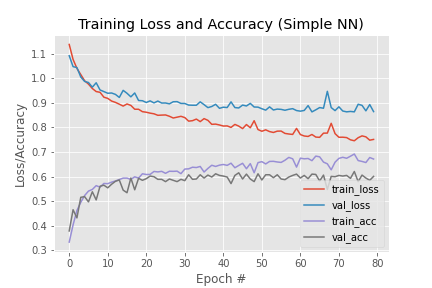

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

In [ ]:
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving vodopad.jpg to vodopad.jpg


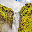

In [ ]:
from google.colab import files
uploaded = files.upload() 


image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [ ]:
image = image.flatten()

image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [ ]:
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [ ]:
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 62ms/step
[[0.95961356 0.00253107 0.01216975]]


In [ ]:
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [ ]:
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[ 83, 108, 112],
        [ 81, 106, 110],
        [ 81, 107, 107],
        ...,
        [172, 217, 228],
        [173, 214, 223],
        [172, 211, 220]],

       [[ 84, 105, 106],
        [ 77,  98,  99],
        [ 73,  95,  93],
        ...,
        [172, 214, 226],
        [171, 213, 220],
        [170, 209, 217]],

       [[ 82,  99,  96],
        [ 73,  90,  87],
        [ 66,  86,  81],
        ...,
        [170, 213, 222],
        [169, 213, 220],
        [168, 210, 217]],

       ...,

       [[ 54,  62,  61],
        [ 51,  59,  58],
        [ 46,  54,  54],
        ...,
        [ 92, 113, 140],
        [ 86, 108, 133],
        [ 85, 105, 130]],

       [[ 56,  64,  63],
        [ 52,  60,  59],
        [ 47,  55,  55],
        ...,
        [143, 162, 177],
        [144, 164, 175],
        [145, 163, 174]],

       [[ 57,  65,  64],
        [ 53,  61,  60],
        [ 48,  56,  56],
        ...,
        [133, 141, 158],
        [131, 138, 155],
        [128, 132, 150]]

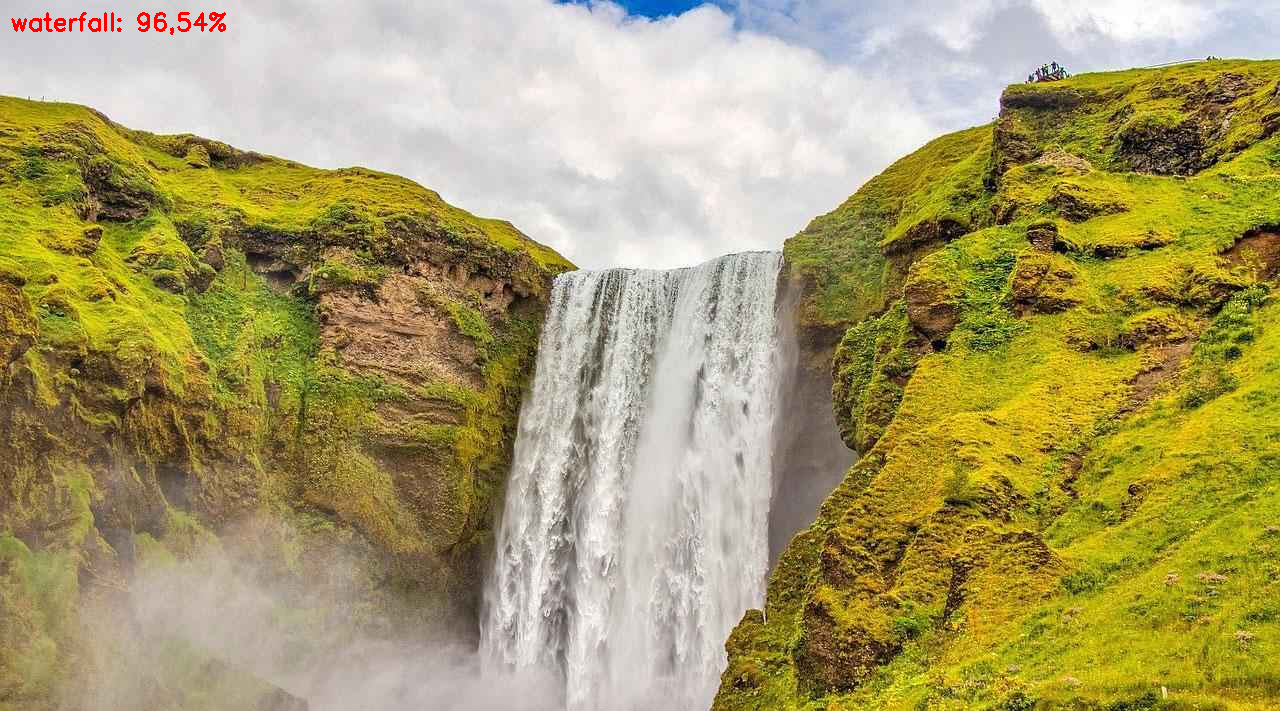

In [ ]:
cv2_imshow(output)